Load Data

In [ ]:
!pip install kaggle

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
import json
import zipfile
import os

api_token = {"username":"dikabagas","key":"94cfcbad73cec14f9755e2f2977d261c"}
with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d tourist55/alzheimers-dataset-4-class-of-images

alzheimers-dataset-4-class-of-images.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
local_zip = '/content/alzheimers-dataset-4-class-of-images.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
check_dir = "/content/Alzheimer_s Dataset"
print(os.listdir(check_dir))

['train', 'test']


In [ ]:
train_dir = os.path.join(check_dir, 'train')
test_dir = os.path.join(check_dir, 'test')

NonDemented_training_dir = os.path.join(train_dir, 'NonDemented')
VeryMildDemented_training_dir = os.path.join(train_dir, 'VeryMildDemented')
ModerateDemented_training_dir = os.path.join(train_dir, 'ModerateDemented')
MildDemented_training_dir = os.path.join(train_dir, 'MildDemented')

NonDemented_test_dir = os.path.join(test_dir, 'NonDemented')
VeryMildDemented_test_dir = os.path.join(test_dir, 'VeryMildDemented')
ModerateDemented_test_dir = os.path.join(test_dir, 'ModerateDemented')
MildDemented_test_dir = os.path.join(test_dir, 'MildDemented')

In [ ]:
print('Total train NonDemented images :', len(os.listdir(NonDemented_training_dir)))
print('Total train VeryMildDemented images:', len(os.listdir(VeryMildDemented_training_dir)))
print('Total train ModerateDemented images :', len(os.listdir(ModerateDemented_training_dir)))
print('Total train MildDemented images:', len(os.listdir(MildDemented_training_dir)))

print('\nTotal test NonDemented images :', len(os.listdir(NonDemented_test_dir)))
print('Total test VeryMildDemented images:', len(os.listdir(VeryMildDemented_test_dir)))
print('Total test ModerateDemented images :', len(os.listdir(ModerateDemented_test_dir)))
print('Total test MildDemented images:', len(os.listdir(MildDemented_test_dir)))

Total train NonDemented images : 2560
Total train VeryMildDemented images: 1792
Total train ModerateDemented images : 52
Total train MildDemented images: 717

Total test NonDemented images : 640
Total test VeryMildDemented images: 448
Total test ModerateDemented images : 12
Total test MildDemented images: 179


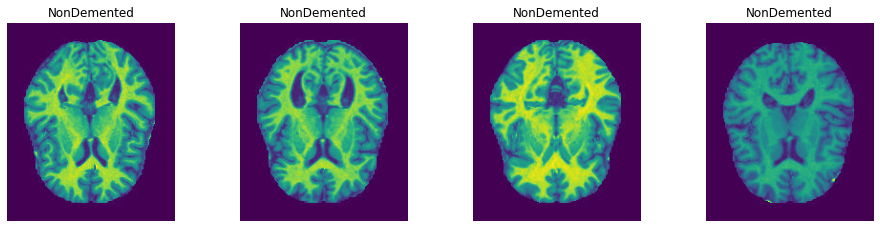

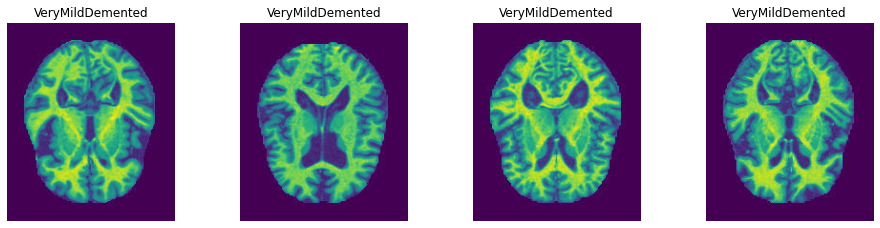

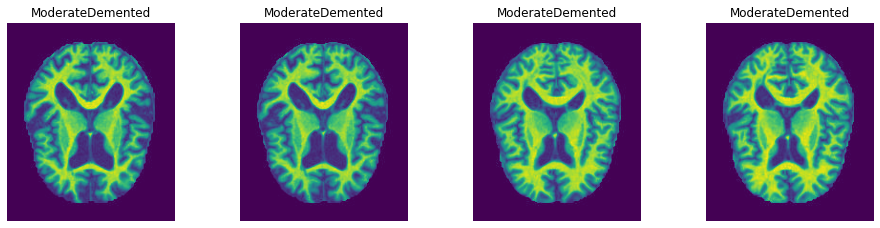

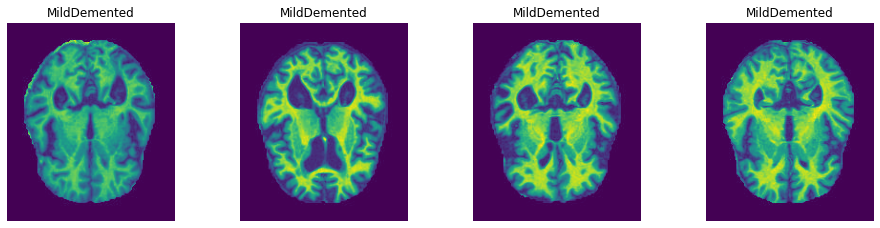

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mping

NonDemented_images = os.listdir(NonDemented_training_dir)
VeryMildDemented_images = os.listdir(VeryMildDemented_training_dir)
ModerateDemented_images = os.listdir(ModerateDemented_training_dir)
MildDemented_images = os.listdir(MildDemented_training_dir)

fname1 = [os.path.join(NonDemented_training_dir,fname)
        for fname in NonDemented_images[:4]]

fname2 = [os.path.join(VeryMildDemented_training_dir,fname)
        for fname in VeryMildDemented_images[:4]]

fname3 = [os.path.join(ModerateDemented_training_dir,fname)
        for fname in ModerateDemented_images[:4]]

fname4 = [os.path.join(MildDemented_training_dir,fname)
        for fname in MildDemented_images[:4]]

ncolu = 4
nrow = 2
fig = plt.gcf()
fig.set_size_inches(ncolu*4,nrow*4)
for i,fname in enumerate(fname1):
    sp = plt.subplot(2,4,i+1)
    sp.axis('off')
    img = mping.imread(fname)
    plt.title('NonDemented')
    plt.imshow(img)
plt.show()

ncolu = 4
nrow = 2
fig = plt.gcf()
fig.set_size_inches(ncolu*4,nrow*4)
for i,fname in enumerate(fname2):
    sp = plt.subplot(2,4,i+1)
    sp.axis('off')
    img = mping.imread(fname)
    plt.title('VeryMildDemented')
    plt.imshow(img)
plt.show()

ncolu = 4
nrow = 2
fig = plt.gcf()
fig.set_size_inches(ncolu*4,nrow*4)
for i,fname in enumerate(fname3):
    sp = plt.subplot(2,4,i+1)
    sp.axis('off')
    img = mping.imread(fname)
    plt.title('ModerateDemented')
    plt.imshow(img)
plt.show()

ncolu = 4
nrow = 2
fig = plt.gcf()
fig.set_size_inches(ncolu*4,nrow*4)
for i,fname in enumerate(fname4):
    sp = plt.subplot(2,4,i+1)
    sp.axis('off')
    img = mping.imread(fname)
    plt.title('MildDemented')
    plt.imshow(img)
plt.show()

Preprocessing

In [ ]:
import cv2
import numpy as np

# Gather data train
train_data = []
train_label = []
for r, d, f in os.walk(train_dir):
    for file in f:
        if ".jpg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            train_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            train_label.append(label)

train_data = np.array(train_data)
train_label = np.array(train_label)

In [ ]:
# Gather data test
test_data = []
test_label = []
for r, d, f in os.walk(test_dir):
    for file in f:
        if ".jpg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            test_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            test_label.append(label)

test_data = np.array(test_data)
test_label = np.array(test_label)

In [ ]:
# Tampilkan shape dari data train dan data test
print("Train Data = ", train_data.shape)
print("Train Label = ", train_label.shape)
print("Test Data = ", test_data.shape)
print("Test Label = ", test_label.shape)

Train Data =  (5121, 150, 150, 3)
Train Label =  (5121,)
Test Data =  (1279, 150, 150, 3)
Test Label =  (1279,)


In [ ]:
# Normalisasi dataset
print("Data sebelum di-normalisasi ", train_data[0][0][0])

x_train = train_data.astype('float32') / 255.0
x_test = test_data.astype('float32') / 255.0
print("Data setelah di-normalisasi ", x_train[0][0][0])

Data sebelum di-normalisasi  [0 0 0]
Data setelah di-normalisasi  [0. 0. 0.]


In [ ]:
# Transformasi label encoder
from sklearn.preprocessing import LabelEncoder

print("Label sebelum di-encoder ", train_label[995:1005])

lb = LabelEncoder()
y_train = lb.fit_transform(train_label)
y_test = lb.fit_transform(test_label)

print("Label setelah di-encoder ", y_train[995:1005])

Label sebelum di-encoder  ['NonDemented' 'NonDemented' 'NonDemented' 'NonDemented' 'NonDemented'
 'NonDemented' 'NonDemented' 'NonDemented' 'NonDemented' 'NonDemented']
Label setelah di-encoder  [2 2 2 2 2 2 2 2 2 2]


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, MaxPool2D, Flatten

In [ ]:
# Feature Extraction Layer
model = Sequential()

model.add(InputLayer(input_shape=[150,150,3]))
model.add(Conv2D(filters=16, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Flatten())

In [ ]:
# Fully Connected Layer
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# Print model summary
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 38, 38, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 38, 38, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 19, 19, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 23104)             0

In [ ]:
# Compile model
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.0015),
              loss='binary_crossentropy', 
              metrics=['acc'])

In [ ]:
H = model.fit(x_train, y_train, batch_size=32, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
161/161 [==============================] - 37s 39ms/step - loss: -536504401920.0000 - acc: 0.0102 - val_loss: -6264807489536.0000 - val_acc: 0.0094
Epoch 2/100
161/161 [==============================] - 6s 35ms/step - loss: -751027846381568.0000 - acc: 0.0102 - val_loss: -3807170680324096.0000 - val_acc: 0.0094
Epoch 3/100
161/161 [==============================] - 6s 35ms/step - loss: -37661172354252800.0000 - acc: 0.0102 - val_loss: -118520636145401856.0000 - val_acc: 0.0094
Epoch 4/100
161/161 [==============================] - 6s 35ms/step - loss: -487661684983332864.0000 - acc: 0.0102 - val_loss: -1151668061351182336.0000 - val_acc: 0.0094
Epoch 5/100
161/161 [==============================] - 6s 35ms/step - loss: -3125393962668392448.0000 - acc: 0.0102 - val_loss: -6153331062941417472.0000 - val_acc: 0.0094
Epoch 6/100
161/161 [==============================] - 6s 36ms/step - loss: -13267167996117254144.0000 - acc: 0.0102 - val_loss: -22945411291917844480.0000 - val_a

KeyboardInterrupt: ignored

In [ ]:
# Mengambil Nilai Acc
acc = H.history['acc']
val_acc = H.history['val_acc']

# Mengambil Nilai Loss 
loss = H.history['loss']
val_loss = H.history['val_loss']

epochs = range(len(acc))

# Plot Accruracy
plt.plot(epochs, acc, 'r', label='Acc')
plt.plot(epochs, val_acc, 'g', label='Val_acc')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

# Plot Loss
plt.plot(epochs, loss, 'r', label='Loss')
plt.plot(epochs, val_loss, 'g', label='Val_loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

In [ ]:
from sklearn.metrics import classification_report

pred = model.predict(x_test)
labels = (pred > 0.5).astype(np.int)

print(classification_report(y_test, labels))